In [541]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.12.0
19.24.6


<a href="https://www.flaticon.com/free-icons/nose" title="nose icons">Nose icons created by Freepik - Flaticon</a>

In [542]:
import os
import matplotlib.pyplot as plt
import numpy as np
# /content/cat-whiskers.png

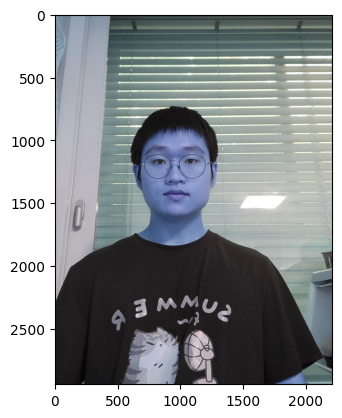

In [543]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, '/content/20250728_115057.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [544]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()

In [545]:
detector_hog = dlib.get_frontal_face_detector()

In [546]:
dlib_rects = detector_hog(img_rgb, 1)

In [547]:
print(f"찾은 얼굴 영역: {dlib_rects}")

찾은 얼굴 영역: rectangles[[(664, 1035) (1219, 1589)]]


In [548]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    img_rgb = cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

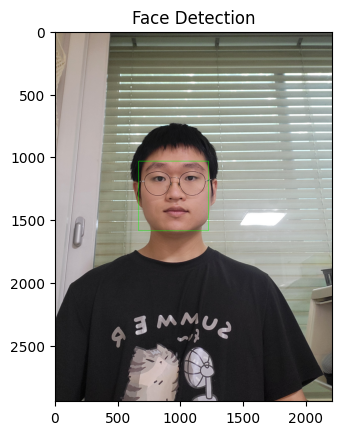

첫 번째 얼굴 영역 좌표 (l, t, r, b): (664, 1035, 1219, 1589)


In [549]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.title("Face Detection")
plt.show()
print(f"첫 번째 얼굴 영역 좌표 (l, t, r, b): ({l}, {t}, {r}, {b})")

In [550]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 /content/abcd
!bzip2 -d /content/abcd/shape_predictor_68_face_landmarks.dat.bz2

--2025-07-28 08:12:55--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-07-28 08:12:56--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  35.4MB/s    in 1.7s    

2025-07-28 08:12:58 (35.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file /content/abcd/shape_predictor_68_face_landmarks.dat already exists.


In [551]:
model_path = os.path.join(home_dir, '/content/abcd/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [552]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


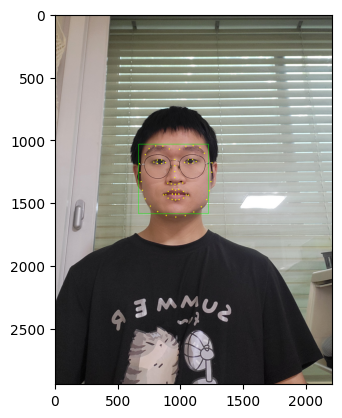

In [553]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 5)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [554]:
sticker_path = os.path.join(home_dir, '/content/cat-whiskers.png') # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(556) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(556, 556, 3)


In [555]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[51])
    x = (landmark[51][0] +landmark[33][0]) // 2 #인중 한가운데로
    y = (landmark[51][1] +landmark[33][1]) // 2 - dlib_rect.height() // 2
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    #인중이 957, 1101

(957, 1402)
(x,y) : (955,1101)
(w,h) : (556,556)


In [556]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨
refined_x = x - w //2
refined_y = y
print (f'(refined x,refined y) : ({refined_x},{refined_y})')
# print(w,h)
# print(x,y)

(refined x,refined y) : (677,1101)


In [557]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# img_sticker에서 흰색 픽셀을 찾기 위한 마스크 생성
# 스티커 이미지의 각 픽셀이 (255, 255, 255) (흰색)인지 확인합니다.
white_pixel_mask = np.all(img_sticker == [255, 255, 255], axis=-1, keepdims=True)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(white_pixel_mask, sticker_area, img_sticker).astype(np.uint8)

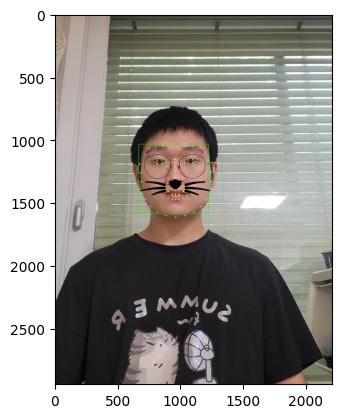

In [558]:
# 수염 이미지를 적용한 이미지를 보여준다.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

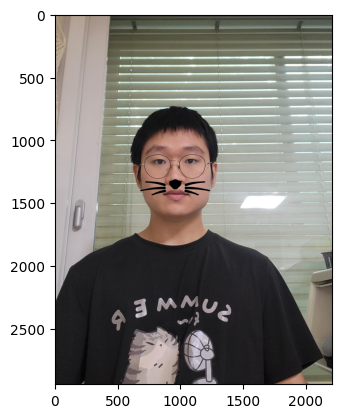

In [559]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(white_pixel_mask, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

사용자가 셀프 카메라 촬영 시 얼굴의 각도나 방향을 변경할 경우, 스티커 이미지가 얼굴의 형태 변화에 맞춰 자연스럽게 변형되지 않고 부자연스럽게 적용되는 현상이 보인다. 이는 스티커를 적용하는 로직이 2차원정보만을 기반으로 하기 때문이다. 이에 3d 얼굴 랜드마크를 활용하면 얼굴이 틀어지거나 기울어져 있는 얼굴에도 적용할 수 있을 것이다. 또한 데이터 증강을 통해 기울어진 얼굴의 데이터를 수집한다면 3d 랜드마크를 찾는 모델에 데이터셋으로 활용 가능할 것 같다.